The aim of this project is for familiarisation of Pandas as well as to try out various Data Visualisation Techniques.

### 1. Importing

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

births_df = pd.read_csv('US_births_1994-2003_CDC_NCHS.csv')

### 2. Exploring Dataset

In [253]:
# Finding Header
print(births_df.columns)

Index(['year', 'month', 'date_of_month', 'day_of_week', 'births'], dtype='object')


In [254]:
# Finding out the dimensions of the Dataset
print(f"There are {births_df.shape[0]} rows and {births_df.shape[1]} columns")

There are 3652 rows and 5 columns


In [255]:
# Taking a look at the first 4 rows
print(births_df.head(4))

   year  month  date_of_month  day_of_week  births
0  1994      1              1            6    8096
1  1994      1              2            7    7772
2  1994      1              3            1   10142
3  1994      1              4            2   11248


In [256]:
# Finding out the overall stats
print(births_df.describe())

              year        month  date_of_month  day_of_week        births
count  3652.000000  3652.000000    3652.000000  3652.000000   3652.000000
mean   1998.499726     6.523549      15.727820     3.999726  10876.817360
std       2.872293     3.449005       8.800529     2.000753   1858.566631
min    1994.000000     1.000000       1.000000     1.000000   6443.000000
25%    1996.000000     4.000000       8.000000     2.000000   8844.500000
50%    1998.500000     7.000000      16.000000     4.000000  11615.000000
75%    2001.000000    10.000000      23.000000     6.000000  12274.250000
max    2003.000000    12.000000      31.000000     7.000000  14540.000000


In [257]:
# Finding year & day with highest & lowest number of births
print(births_df.sort_values('births'))
print(f"\nfrom this, we know that: \n25 Dec 2001, Tuesday == lowest number of births \n9 Sept 1999, Thursday == highest number of births")

      year  month  date_of_month  day_of_week  births
2915  2001     12             25            2    6443
2550  2000     12             25            1    6566
3645  2003     12             25            4    6628
3280  2002     12             25            3    6629
2184  1999     12             25            6    6674
...    ...    ...            ...          ...     ...
3552  2003      9             23            2   14036
3532  2003      9              3            3   14119
3545  2003      9             16            2   14145
3650  2003     12             30            2   14438
2077  1999      9              9            4   14540

[3652 rows x 5 columns]

from this, we know that: 
25 Dec 2001, Tuesday == lowest number of births 
9 Sept 1999, Thursday == highest number of births


### 3. Cleaning Dataset

Although this Dataset was obtained from a reliable source, we still do the usual of looking through and ensuring that the Dataset is clean.
<br/>
<br/>
Things that we're looking out for:

1. There is no row with NaN or missing data.
2. There is indeed data from the years {1994} to {2003}.
3. It accounts for everyday of the week, from Monday to Sunday.

In [258]:
births_df = births_df.dropna()
print(f"now, all the rows with any field empty will have been removed")

now, all the rows with any field empty will have been removed


In [259]:
years = births_df.year.unique().tolist()
print(years)

[1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003]


In [260]:
print(births_df.day_of_week.unique())

[6 7 1 2 3 4 5]


In [261]:
days = births_df.date_of_month.unique().tolist()
print(days)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


### 4. Sorting Dataset

For the purpose of this dataset, there are few interesting things I think would be useful to be seen visualised. 
</br> 
</br> 
_in the following format: {y} against {x}_

1. Total number of births against year
2. Average number of births against year
3. Average number of births against day of the week
4. Average number of births against month of the year

Therefore, we need to split the original dataset into seperate datasets

In [262]:
def plot_bargraph(dataset: pd.DataFrame, x_axis: str, y_axis: str, y_lim: list[int], labels: list[str]) -> None:
    plt.bar(dataset[x_axis], dataset[y_axis], width = 0.5)
    plt.ylim(y_lim)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.title(labels[2])
    plt.show()

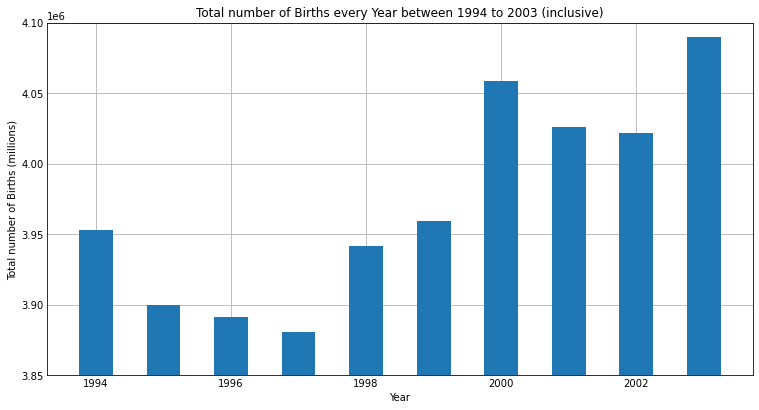

In [263]:
graph1 = births_df.groupby(['year'])['births'].sum().reset_index()
fig = plt.figure(figsize = (10, 5))
plot_bargraph(graph1, 
        'year', 
        'births', 
        [3850000, 4100000], 
        ['Year','Total number of Births (millions)', 'Total number of Births every Year between 1994 to 2003 (inclusive)']
        )

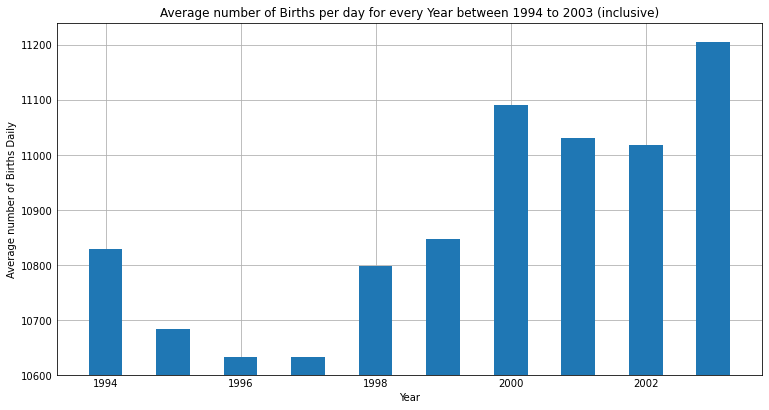

In [264]:
graph2 = births_df.groupby(['year'])['births'].mean().reset_index()
fig = plt.figure(figsize = (10, 5))
plot_bargraph(graph2, 
        'year', 
        'births', 
        [10600, 11240], 
        ['Year','Average number of Births Daily', 'Average number of Births per day for every Year between 1994 to 2003 (inclusive)']
        )

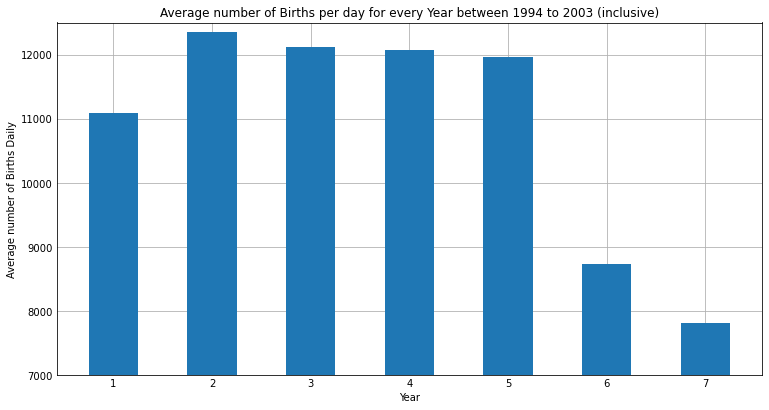

In [266]:
graph2 = births_df.groupby(['day_of_week'])['births'].mean().reset_index()
fig = plt.figure(figsize = (10, 5))
plot_bargraph(graph2, 
        'day_of_week', 
        'births', 
        [7000,12500], 
        ['Year','Average number of Births Daily', 'Average number of Births per day for every Year between 1994 to 2003 (inclusive)'],
        )